## Import Library untuk EDA, Modelling, Visualisasi dan Evaluasi

In [ ]:
# Import library numerik
# Untuk komputasi numerik seperti log, array, differencing
import numpy as np

# Import library untuk manipulasi dan analisis data dalam bentuk tabel
# Untuk membaca dan mengolah data dalam bentuk DataFrame
import pandas as pd

# Import fungsi ADF (Augmented Dickey-Fuller) Test dari statsmodels untuk uji stasioneritas data time series
# Untuk menguji apakah data time series stasioner
from statsmodels.tsa.stattools import adfuller

# Import matplotlib untuk visualisasi data seperti grafik tren dan forecast
# Untuk membuat grafik
import matplotlib.pyplot as plt

# Import ARIMA model dari statsmodels untuk forecasting data time series yang mengandung tren
# Untuk membangun dan melatih model ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Import Exponential Smoothing (ETS) model dari statsmodels untuk data dengan tren dan musiman
# Untuk model ETS (trend dan seasonality)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Import MAPE dari sklearn untuk mengevaluasi akurasi model forecasting
# Untuk menghitung error model (semakin kecil semakin baik)
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Import joblib untuk menyimpan dan memuat model yang sudah dilatih
import joblib  # Untuk save/load model ke file .pkl (agar tidak perlu dilatih ulang)

## Load data dan Preview

In [ ]:
df_1 = pd.read_csv('/content/sales_data_january_2019.csv')
df_2 =  pd.read_csv('/content/sales_data_february_2019.csv')
df_3 = pd.read_csv('/content/sales_data_march_2019.csv')
df_4 =pd.read_csv('/content/sales_data_april_2019.csv')
df_5 = pd.read_csv('/content/sales_data_may_2019.csv')
df_6 = pd.read_csv('/content/sales_data_june_2019.csv')
df_7 = pd.read_csv('/content/sales_data_july_2019.csv')
df_8 = pd.read_csv('/content/sales_data_august_2019.csv')
df_9 = pd.read_csv('/content/sales_data_september_2019.csv')
df_10 = pd.read_csv('/content/sales_data_october_2019.csv')
df_11 = pd.read_csv('/content/sales_data_november_2019.csv')
df_12 = pd.read_csv('/content/sales_data_december_2019.csv')

In [ ]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10,df_11, df_12], ignore_index=True)
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df.duplicated().sum()

np.int64(1162)

In [ ]:
df = df.drop_duplicates()

## Drop Missing Values

In [ ]:
# Step 1 & 2: Eksplorasi dan Pembersihan Data
# Drop missing rows
df_clean = df.dropna()

In [ ]:
df_clean.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Mengkonversi Kolom Numerik (Quantity Ordered dan Price Each)

In [ ]:
# Lakukan proses konversi kolom 'Quantity Ordered' dan 'Price Each' ke tipe data numerik
# Gunakan errors='coerce' untuk mengubah nilai yang tidak bisa dikonversi menjadi NaN
df_clean['Quantity Ordered'] = pd.to_numeric(df_clean['Quantity Ordered'], errors='coerce')  # Mengubah nilai ke angka, jika error jadi NaN
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'], errors='coerce')  # Sama seperti di atas

/tmp/ipython-input-518-3411546557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Quantity Ordered'] = pd.to_numeric(df_clean['Quantity Ordered'], errors='coerce')  # Mengubah nilai ke angka, jika error jadi NaN
/tmp/ipython-input-518-3411546557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'], errors='coerce')  # Sama seperti di atas


## Drop baris yang nilainya NaN setelah konversi numerik

In [ ]:
# Hapus baris yang memiliki nilai kosong (NaN) setelah konversi ke numerik
# Biasanya terjadi jika ada data yang salah format, misalnya huruf di kolom angka
df_clean = df_clean.dropna(subset=['Quantity Ordered', 'Price Each'])  # Hanya hapus baris yang kolom ini kosong
# Tampilkan satu baris pertama untuk memastikan hasilnya bersih
df_clean.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"


## Konversi Kolom Tanggal ke datetime format

In [ ]:
# Ubah kolom 'Order Date' menjadi format datetime
# Gunakan errors='coerce' agar data yang tidak bisa dikonversi (misalnya format salah) menjadi NaT (Not a Time)
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')
df_clean.head(1)

/tmp/ipython-input-520-4129842114.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"


In [ ]:
# Hapus baris yang memiliki 'Order Date' kosong atau tidak valid (NaN)
# Ini biasanya hasil dari kesalahan format saat konversi ke datetime
df_clean = df_clean.dropna(subset=['Order Date'])

In [ ]:
df_clean['Hour'] = df_clean['Order Date'].dt.hour
df_clean.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour
0,141234,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21


In [ ]:
# Tambahkan kolom baru bernama 'Revenue' (total penjualan per baris transaksi)
# Didapat dari mengalikan jumlah barang yang dipesan dengan harga per item
df_clean['Revenue'] = df_clean['Quantity Ordered'] * df_clean['Price Each']
df_clean.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Revenue
0,141234,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,700.0


## 1.Hitunglah total revenue, jumlah order, dan jumlah barang yang terjual sepanjang tahun 2019. Selain itu, hitung rata-rata jumlah barang yang dibeli per transaksi dan rata-rata spending per transaksi.

### Total Revenue (GMV) sepanjang Tahun

In [ ]:
total_revenue = df_clean['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $34,465,537.94


### Total Order (Order ID Unik)

In [ ]:
jumlah_order = df_clean['Order ID'].nunique()
print(f"Jumlah Order: {jumlah_order}")

Jumlah Order: 178437


### Jumlah Barang Terjual (Quantity Ordered Total)

In [ ]:
total_barang_terjual = df_clean['Quantity Ordered'].sum()
print(f"Jumlah Barang Terjual: {int(total_barang_terjual)} unit")

Jumlah Barang Terjual: 208812 unit


### Rata-rata Barang per Transaksi

In [ ]:
rata_barang_per_order = total_barang_terjual / jumlah_order
print(f"Rata-rata Barang per Transaksi: {rata_barang_per_order:.2f}")

Rata-rata Barang per Transaksi: 1.17


### Rata-rata Spending per Transaksi

In [ ]:
rata_spending_per_order = total_revenue / jumlah_order
print(f"Rata-rata Spending per Transaksi: ${rata_spending_per_order:.2f}")

Rata-rata Spending per Transaksi: $193.15


##  2. Hitunglah jumlah order dan GMV yang diperoleh dengan rentang waktu berikut:
  Harian
  Mingguan
  Bulanan


### Harian - Jumlah Order dan GMV per Hari

In [ ]:
# Group berdasarkan tanggal (tanpa jam)
daily_data = df_clean.groupby(df_clean['Order Date'].dt.date).agg({
    'Order ID': 'nunique',          # Jumlah order unik per hari
    'Revenue': 'sum'                # Total revenue per hari
}).reset_index()

# Rename kolom
daily_data.columns = ['Date', 'Total_Orders', 'Total_Revenue']

# Lihat 5 baris pertama
print(daily_data.head())

         Date  Total_Orders  Total_Revenue
0  2019-01-01           287       65681.94
1  2019-01-02           308       70663.20
2  2019-01-03           286       47046.20
3  2019-01-04           282       62000.22
4  2019-01-05           301       46524.63


### Mingguan - Jumlah Order dan GMV per hari

In [ ]:
# Tambahkan kolom mingguan berdasarkan 'Order Date'
df_clean['Week'] = df_clean['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_data = df_clean.groupby('Week').agg({
    'Order ID': 'nunique',
    'Revenue': 'sum'
}).reset_index()

weekly_data.columns = ['Week_Start', 'Total_Orders', 'Total_Revenue']

# Lihat hasil awal
print(weekly_data.head())

  Week_Start  Total_Orders  Total_Revenue
0 2018-12-31          1743      344678.73
1 2019-01-07          2104      409389.43
2 2019-01-14          2104      394921.11
3 2019-01-21          2134      426020.17
4 2019-01-28          2381      459570.62


### Bulanan - Jumlah Order dan GMV per Bulan

In [ ]:
# Tambahkan kolom bulanan berdasarkan 'Order Date'
df_clean['Month'] = df_clean['Order Date'].dt.to_period('M').astype(str)

monthly_data = df_clean.groupby('Month').agg({
    'Order ID': 'nunique',
    'Revenue': 'sum'
}).reset_index()

monthly_data.columns = ['Month', 'Total_Orders', 'Total_Revenue']

# Lihat hasil awal
print(monthly_data.head())

     Month  Total_Orders  Total_Revenue
0  2019-01          9262     1812742.87
1  2019-02         11496     2200078.08
2  2019-03         14549     2804973.35
3  2019-04         17528     3389217.98
4  2019-05         15836     3150616.23


## 3. Catatan: GMV dihitung berdasarkan total spending yang dilakukan customer dengan memperhitungkan semua biaya dan diskon yang dibayarkan customer.


### Ekstrak Nama Kota dari Purchase Addres

In [ ]:
# Ekstrak kota dari kolom 'Purchase Address'
df_clean['City'] = df_clean['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Lihat hasil awal
print(df_clean[['Purchase Address', 'City']].head())

                        Purchase Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


### Hitung GMV (total Revenue per Kota)

In [ ]:
gmv_per_city = df_clean.groupby('City').agg({
    'Revenue': 'sum'
}).reset_index()

gmv_per_city.columns = ['City', 'Total_GMV']

# Urutkan dari yang terbesar
gmv_per_city = gmv_per_city.sort_values(by='Total_GMV', ascending=False)

# Tampilkan 5 kota dengan GMV tertinggi
print(gmv_per_city.head())

            City   Total_GMV
7  San Francisco  8254743.55
4    Los Angeles  5448304.28
5  New York City  4661867.14
2         Boston  3658627.65
0        Atlanta  2794199.07


## 4. Tim marketing ingin mengetahui produk apa saja yang paling sering dibeli dalam 1 tahun terakhir. Rencananya, mereka akan mencoba mem-bundling top produk ini untuk meningkatkan penjualan. Identifikasi top 10 produk yang membawa revenue terbesar dalam 3 bulan terakhir dan produk apa saja yang bisa di-bundling berdasarkan hasil analisis.

### Filter 3 Bulan Terakhir (Oktober -Desember 2019)

In [ ]:
# Tambahkan kolom bulan untuk filter
df_clean['Month'] = df_clean['Order Date'].dt.month

# Filter data untuk bulan Oktober (10), November (11), dan Desember (12)
last_3_months = df_clean[df_clean['Month'].isin([10,11,12])]

### Hitung Total Revenue Per Produk

In [ ]:
# Hitung total revenue per produk
top_products_revenue = last_3_months.groupby('Product')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Ambil 10 produk teratas dengan revenue terbesar
top_10_products = top_products_revenue.head(10)
top_10_products

,Product,Revenue
0,Macbook Pro Laptop,2733600.00
1,iPhone,1600900.00
2,ThinkPad Laptop,1371986.28
3,Google Phone,1082400.00
4,27in 4K Gaming Monitor,841988.41
5,Apple Airpods Headphones,787800.00
6,34in Ultrawide Monitor,786579.30
7,Flatscreen TV,493800.00
8,Bose SoundSport Headphones,453054.69
9,27in FHD Monitor,370325.31


### Analisis Produk apa saja yang bisa di bundling, analisis dari transaksi (Order ID) yang berisi lebih dari 1 Produk

In [ ]:
# 1. Filter data 3 bulan terakhir (Okt–Des)
last_3_months = df_clean[df_clean['Month'].isin([10, 11, 12])].copy()

# 2. Hitung revenue per produk dan ambil Top 10
last_3_months['Revenue'] = last_3_months['Quantity Ordered'] * last_3_months['Price Each']
top_products = (last_3_months.groupby('Product')['Revenue']
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())

# 3. Ambil semua transaksi multi-produk
multi_order_ids = last_3_months.groupby('Order ID')['Product'].nunique()
multi_order_ids = multi_order_ids[multi_order_ids > 1].index
multi_orders = last_3_months[last_3_months['Order ID'].isin(multi_order_ids)]

# 4. Gabungkan produk per order
grouped = multi_orders.groupby('Order ID')['Product'].apply(list)

from itertools import combinations
from collections import Counter

combo_counter = Counter()

for products in grouped:
    filtered = [p for p in products if p in top_products['Product'].values]  # hanya top 10
    if len(filtered) > 1:
        for combo in combinations(sorted(filtered), 2):
            combo_counter[combo] += 1

# 5. Tampilkan hasil bundling potensial
top_combos = combo_counter.most_common(10)
for pair, count in top_combos:
    print(f"{pair}: {count} kali dibeli bersama")

('Apple Airpods Headphones', 'iPhone'): 132 kali dibeli bersama
('Bose SoundSport Headphones', 'Google Phone'): 81 kali dibeli bersama
('Apple Airpods Headphones', 'Bose SoundSport Headphones'): 16 kali dibeli bersama
('27in FHD Monitor', 'Apple Airpods Headphones'): 10 kali dibeli bersama
('34in Ultrawide Monitor', 'Bose SoundSport Headphones'): 8 kali dibeli bersama
('27in FHD Monitor', 'Bose SoundSport Headphones'): 8 kali dibeli bersama
('27in 4K Gaming Monitor', 'Bose SoundSport Headphones'): 7 kali dibeli bersama
('Apple Airpods Headphones', 'Google Phone'): 7 kali dibeli bersama
('Apple Airpods Headphones', 'Macbook Pro Laptop'): 7 kali dibeli bersama
('27in 4K Gaming Monitor', 'Apple Airpods Headphones'): 6 kali dibeli bersama


## 5.Identifikasi top 5 kota yang memiliki order terbanyak dan 5 kota yang memiliki total dan rata-rata spending terbesar.

### Ekstrak Informasi Kota dari Alamat

In [ ]:
# Ekstrak kota dari 'Purchase Address'
df_clean['City'] = df_clean['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df_clean[['Purchase Address','City']].head()

,Purchase Address,City
0,"944 Walnut St, Boston, MA 02215",Boston
1,"185 Maple St, Portland, OR 97035",Portland
2,"538 Adams St, San Francisco, CA 94016",San Francisco
3,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,"387 10th St, Austin, TX 73301",Austin


### Hitung Jumlah Order Per Kota (Top 5 Kota dengan Jumlah Order Terbanyak)

In [ ]:
order_per_city = df_clean.groupby('City')['Order ID'].nunique().sort_values(ascending=False).reset_index()
order_per_city.columns = ['City', 'Total Orders']
top_5_city_orders = order_per_city.head(5)
top_5_city_orders

,City,Total Orders
0,San Francisco,42898
1,Los Angeles,28498
2,New York City,23848
3,Boston,19092
4,Atlanta,14253


### Hitung total Revenue (GMV) per Kota (Top 5 Kota dengan total spending terbesar)

In [ ]:
revenue_per_city = df_clean.groupby('City')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_per_city.columns = ['City', 'Total_Revenue']
top_5_city_revenue = revenue_per_city.head(5)
top_5_city_revenue

,City,Total_Revenue
0,San Francisco,8254743.55
1,Los Angeles,5448304.28
2,New York City,4661867.14
3,Boston,3658627.65
4,Atlanta,2794199.07


### Hitung rata-rata spending per Transaksi per Kota (Top 5 Kota dengan rata-rata spending per transaksi tertinggi)

In [ ]:
# Jumlah transaksi per kota
transactions_per_city = df_clean.groupby('City')['Order ID'].nunique()

# Rata-rata revenue per transaksi = total revenue ÷ jumlah order
average_revenue_per_city = (df_clean.groupby('City')['Revenue'].sum() / transactions_per_city).sort_values(ascending=False).reset_index()
average_revenue_per_city.columns = ['City', 'Average_Revenue_Per_Transaction']
top_5_city_avg_revenue = average_revenue_per_city.head(5)
top_5_city_avg_revenue

,City,Average_Revenue_Per_Transaction
0,Atlanta,196.042873
1,New York City,195.482520
2,Seattle,194.422128
3,Dallas,194.197610
4,Portland,193.600329


## 6. Tim marketing ingin mengetahui kapan penjualan mencapai titik tertinggi sehingga mereka bisa merancang strategi marketing. Analisis pada rentang jam berapa penjualan terjadi secara aktif (rush hour).

### Hitung total transaksi per Jam

In [ ]:
#Hitung Jumlah Transaksi per Jam
orders_per_hour = df_clean.groupby('Hour')['Order ID'].nunique().reset_index()
#Ubah nama kolom agar lebih mudah dipahami
orders_per_hour.columns = ['Hour', 'Total_Orders']
# Tampilkan Jumlah order per Jam
orders_per_hour.head()

,Hour,Total_Orders
0,0,3758
1,1,2255
2,2,1196
3,3,804
4,4,814


In [ ]:
# Hitung jumlah transaksi unik per jam
orders_per_hour = df_clean.groupby('Hour')['Order ID'].nunique().reset_index()

# Ubah nama kolom agar lebih mudah dipahami
orders_per_hour.columns = ['Hour', 'Total_Orders']

# Tampilkan tabel jumlah order per jam
orders_per_hour.sort_values('Total_Orders', ascending=False).head(5)

,Hour,Total_Orders
19,19,12377
12,12,12082
11,11,11882
20,20,11763
18,18,11761


In [ ]:
# Hitung total pendapatan (revenue) per jam
revenue_per_hour = df_clean.groupby('Hour')['Revenue'].sum().reset_index()

# Ubah nama kolom agar lebih deskriptif
revenue_per_hour.columns = ['Hour', 'Total_Revenue']

# Tampilkan top 5 jam dengan revenue tertinggi
revenue_per_hour.sort_values('Total_Revenue', ascending=False).head(5)

,Hour,Total_Revenue
19,19,2411971.14
12,12,2314359.85
11,11,2296619.84
20,20,2280784.36
18,18,2218374.01


In [ ]:
rush_hour_summary = pd.merge(orders_per_hour, revenue_per_hour, on='Hour')
rush_hour_summary.sort_values('Total_Orders', ascending=False).head(5)

,Hour,Total_Orders,Total_Revenue
19,19,12377,2411971.14
12,12,12082,2314359.85
11,11,11882,2296619.84
20,20,11763,2280784.36
18,18,11761,2218374.01


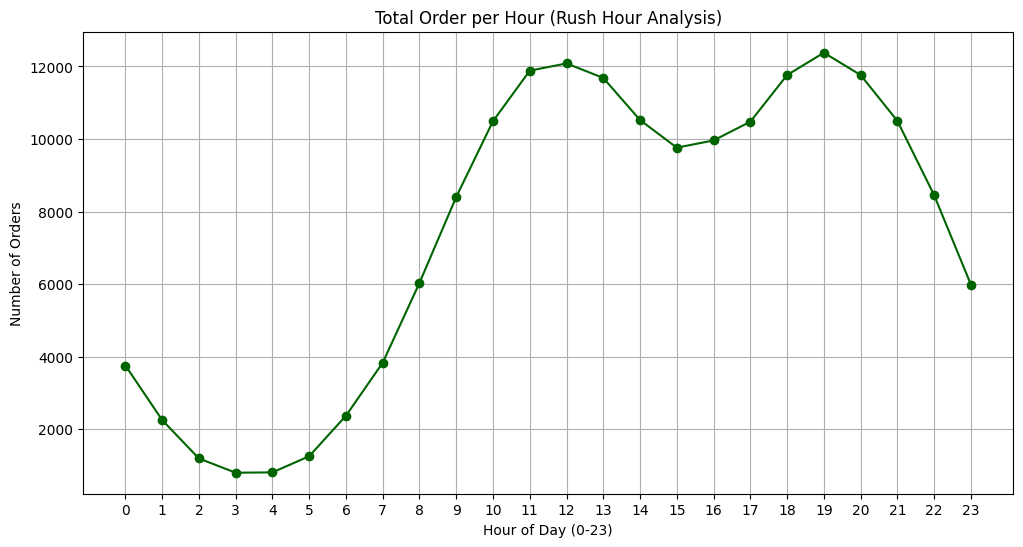

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(orders_per_hour['Hour'], orders_per_hour['Total_Orders'], marker='o', color='darkgreen')
plt.title('Total Order per Hour (Rush Hour Analysis)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Hour              185686 non-null  int32         
 7   Revenue           185686 non-null  float64       
 8   Week              185686 non-null  datetime64[ns]
 9   Month             185686 non-null  int32         
 10  City              185686 non-null  object        
dtypes: datetime64[ns](2), float64(3), int32(2), object(4)
memory usage: 15.6+ MB


## 7.Buatlah model forecasting menggunakan model yang sudah diajarkan pada materi untuk memprediksi jumlah transaksi untuk 1 bulan ke depan dengan data harian. Anda diharuskan setidaknya membuat 2 model untuk selanjutnya diambil model terbaik berdasarkan MAPE terkecil. Berikan rekomendasi apa yang perlu dilakukan tim bisnis berdasarkan hasil forecasting dan analisis Anda.

### Agregasi Harian untuk analisisi Time Series

In [ ]:
# # Pastikan 'Order Date' sudah dalam format datetime
# df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')

# Setelah yakin datetime, baru ambil tanggal saja (tanpa jam) dan lakukan agregasi
daily_revenue = df_clean.groupby(df_clean['Order Date'].dt.date)['Revenue'].sum().reset_index()

# Rename kolom agar lebih deskriptif
daily_revenue.columns = ['Date', 'Total_Revenue']

# Konversi kembali kolom 'Date' ke datetime agar bisa dipakai untuk plotting atau time series model
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])

# Tampilkan hasilnya
daily_revenue.head(5)

,Date,Total_Revenue
0,2019-01-01,65681.94
1,2019-01-02,70663.20
2,2019-01-03,47046.20
3,2019-01-04,62000.22
4,2019-01-05,46524.63


### Agregasi Jumlah Transaksi Harian

In [ ]:
#Mengubah Kolom Order date ke format datetime
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')

#Group data berdasarkan (dt.date) dan hitung transaksi (Order ID)
daily_transaction = df_clean.groupby(df_clean['Order Date'].dt.date)['Order ID'].nunique().reset_index()
#Membuat dataframe daily_transaction
daily_transaction.columns = ['Date', 'Transaction_Count']
daily_transaction['Date'] = pd.to_datetime(daily_transaction['Date'])

In [ ]:
#Mengubah Kolom date jadi datetime dan set jadi index untuk time series
ts_transaction = daily_transaction.set_index('Date')['Transaction_Count']
ts_transaction.head(5)

,Transaction_Count
Date,
2019-01-01,287
2019-01-02,308
2019-01-03,286
2019-01-04,282
2019-01-05,301


In [ ]:
# Lakukan uji ADF (Augmented Dickey-Fuller) untuk mengecek apakah data time series stasioner atau tidak
# Data dikatakan stasioner jika p-value < 0.05 (artinya tidak ada akar unit/root)

adf_result = adfuller(ts_transaction)  # Jalankan ADF Test
print(f'ADF Statistic: {adf_result[0]}')  # Nilai statistik ADF (semakin kecil = lebih stasioner)
print(f'p-value: {adf_result[1]}')        # p-value hasil uji, jika < 0.05 berarti data stasioner

ADF Statistic: -2.5693373565434507
p-value: 0.099501644735832


In [ ]:
# Jika data tidak stasioner (p-value > 0.05), maka kita perlu mentransformasi datanya

# Langkah 1: Terapkan log transform untuk menstabilkan varians (mengurangi efek lonjakan besar)
ts_transaction_log = np.log(ts_transaction)

# Langkah 2: Terapkan differencing (pengurangan nilai dengan nilai sebelumnya)
# Tujuannya untuk menghilangkan tren agar data menjadi lebih stasioner
ts_transaction_log_diff = ts_transaction_log.diff().dropna()  # .diff() akan menghasilkan NaN di baris pertama, maka gunakan .dropna()

In [ ]:
# Lakukan uji ADF lagi setelah transformasi log dan differencing
# Tujuannya untuk memastikan data sudah menjadi stasioner

adf_result_diff = adfuller(ts_transaction_log_diff)  # Jalankan ADF Test pada data yang telah ditransformasi
print(f'ADF Statistic after diff: {adf_result_diff[0]}')  # Statistik ADF baru
print(f'p-value after diff: {adf_result_diff[1]}')        # p-value baru, harus < 0.05 untuk stasioner

ADF Statistic after diff: -11.855563596476848
p-value after diff: 7.041610099983097e-22


### Data sudah stationer, p-value < 0,05

## Evaluasi Model Train 45% = 165 hari dan Test 55% =201 hari

### Kita Coba Split Train = 45% dan Test 55%

In [ ]:
# Pisahkan data menjadi dua bagian: data latih (train) dan data uji (test)
# Di sini, kita gunakan data Februari untuk melatih model
# Dan data Maret digunakan sebagai validasi untuk menguji performa model

train = ts_transaction_log[:'2019-06-14']   # Data latih: sampai 14 Juni
test = ts_transaction_log['2019-06-15':]    # Data uji: mulai dari 15 Juni ke depan

In [ ]:
print(len(train))
print(len(test))

165
201


### Pembuatan Model ARIMA untuk data time Series

In [ ]:
# Buat model ARIMA untuk data time series
# Di sini kita gunakan log(train) agar model lebih stabil terhadap variasi besar (log transform)
# Parameter (1,1,1) artinya: p=1 (Auto REGRESSION), d=1 (differencing), q=1 (MOVING AVERAGE)

model_arima = ARIMA(np.log(train), order=(1,1,1))  # Buat model ARIMA dengan log-transformed data
result_arima = model_arima.fit()  # Latih model ARIMA

# Forecast dalam bentuk log selama panjang data uji
forecast_arima_log = result_arima.forecast(steps=len(test))

# Kembalikan hasil forecast dari skala log ke skala asli dengan fungsi eksponensial
forecast_arima = np.exp(forecast_arima_log)  # Ini adalah hasil prediksi revenue harian

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Buat model ETS (Exponential Smoothing) dengan komponen tren dan musiman
# 'trend="add"' artinya kita mengasumsikan adanya tren naik/turun yang bersifat aditif
# 'seasonal="add"' artinya ada pola musiman (berulang) yang juga ditambahkan
# 'seasonal_periods=7' menunjukkan adanya pola mingguan (7 hari)

model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)  # Buat model ETS
result_ets = model_ets.fit()  # Latih modelnya

# Lakukan prediksi sebanyak panjang data uji
forecast_ets = result_ets.forecast(steps=len(test))  # Hasil prediksi revenue harian dari model ETS

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Pemilihan Model

In [ ]:
# Hitung MAPE (Mean Absolute Percentage Error) untuk mengukur akurasi kedua model
# Semakin kecil nilai MAPE, semakin akurat prediksi model terhadap data aktual

mape_arima = mean_absolute_percentage_error(test, forecast_arima)  # Error ARIMA
mape_ets = mean_absolute_percentage_error(test, forecast_ets)      # Error ETS

# Tampilkan hasil evaluasi dalam format persentase
print(f'MAPE ARIMA: {mape_arima:.2%}')  # Misalnya: 8.45%
print(f'MAPE ETS: {mape_ets:.2%}')

MAPE ARIMA: 4.12%
MAPE ETS: 4.68%


In [ ]:
# Bandingkan nilai MAPE dari ARIMA dan ETS
# Pilih model dengan MAPE terkecil sebagai model terbaik

best_model = "ARIMA" if mape_arima < mape_ets else "ETS"  # Jika MAPE ARIMA lebih kecil, pilih ARIMA, jika tidak pilih ETS

# Tampilkan model terbaik berdasarkan evaluasi MAPE
print(f"Model terbaik berdasarkan MAPE adalah: {best_model}")

Model terbaik berdasarkan MAPE adalah: ARIMA


### Nilai MAPE

In [ ]:
# Forecast ulang selama 30 hari (1 bulan ke depan) menggunakan model terbaik yang sudah ditentukan
steps_ahead = 30  # Prediksi 30 hari ke depan

if best_model == "ARIMA":
    # Fit ulang ARIMA ke seluruh data latih
    tuned_arima_model = ARIMA(train, order=(1,1,1)).fit()

    # Prediksi 30 hari ke depan dalam skala log
    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)

    # Kembalikan hasil ke skala asli
    forecast = np.exp(forecast_log)

else:
    # Fit ulang ETS ke seluruh data latih
    tuned_ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

    # Prediksi 30 hari ke depan
    forecast = tuned_ets_model.forecast(steps=steps_ahead)

# Siapkan tanggal untuk hasil prediksi
forecast.index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=steps_ahead,freq='D')

# Jika kamu memiliki actual test data 30 hari juga (misal Maret), evaluasi bisa dilakukan
# Kalau tidak, langkah evaluasi di bawah hanya ilustratif
# Ubah test ke test_30 jika tersedia, atau sesuaikan:
# Ambil 30 hari pertama dari test, lalu ubah ke skala asli
test_30 = np.exp(test[:steps_ahead])

# Hitung metrik evaluasi
mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))

# Tampilkan hasil evaluasi
print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE: 3.78%
MAE : 15.66
RMSE: 23.15


INSIGHT & INTERPRETASI

1. Akurasi Model Sangat Baik
  Model ARIMA menghasilkan MAPE: 3.78%, yang berarti prediksi model sangat dekat dengan data aktual.

  MAE dan RMSE juga relatif rendah (15.66 dan 23.15), menunjukkan prediksi error rata-rata transaksi per hari cukup kecil.

2. Prediksi Jumlah Transaksi Cenderung Stabil
  Hasil forecasting menunjukkan jumlah transaksi harian dalam 30 hari ke depan stabil, tanpa lonjakan ekstrem atau penurunan signifikan.

  Ini menunjukkan tidak ada indikasi potensi penurunan aktivitas pelanggan, sehingga strategi promosi bisa dilakukan secara terjadwal tanpa perlu mitigasi darurat.

3. Pola Historis Masih Relevan
  Karena model bekerja dengan cukup baik di data validasi, bisa diasumsikan bahwa pola historis masih sangat relevan untuk masa depan jangka pendek (next 1 month).

REKOMENDASI BISNIS

1. Optimalkan Kapasitas Operasional Harian

Karena transaksi diprediksi stabil, perusahaan dapat:
Menyesuaikan kapasitas logistik & gudang secara proporsional
Menjaga stok produk populer tetap tersedia tanpa overstock

2. Luncurkan Promosi Bertahap

Karena tidak ada lonjakan besar yang diprediksi, tim marketing bisa dengan Melakukan bundling atau diskon mingguan ringan secara bertahap.Fokus pada loyalitas pelanggan dan peningkatan average order value, bukan sekadar volume transaksi

3. Manfaatkan Hari-Hari dengan Transaksi Tinggi

Jika ditemukan ada pola musiman mingguan (misal: weekend atau Senin ramai), maka:Fokuskan kampanye digital, flash sale, atau voucher hanya pada hari-hari tersebut Gunakan waktu tersebut untuk uji A/B promosi

4. Perencanaan Inventori Lebih Efisien

Hasil prediksi ini bisa digunakan oleh tim inventory untuk:
Membuat perencanaan pembelian & distribusi barang yang lebih akurat
Menekan biaya simpan & overstocking

5. Monitoring Harian Real-Time

Tetap disarankan untuk:
Melakukan monitoring real-time harian.Jika transaksi aktual menyimpang dari forecast lebih dari ±10%, evaluasi ulang asumsi model perlu dilakukan

## Untuk Forecasting Tahun 2020 Bulan Januari

Menggunakan Seluruh data 2019 (Jan-Des) untuk Malatih Model, karena tidak ada data aktual Januari 2020, maka tidak bisa evaluasi MAPE/MAE, hanya bisa melihat hasil prediksinya saja

In [ ]:
train = ts_transaction[:'2019-12-31']  # Gunakan semua data 2019

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA dengan log transform
model_arima = ARIMA(np.log(train), order=(1,1,1)).fit()

# Prediksi log transaksi 30 hari ke depan
forecast_log = model_arima.forecast(steps=30)

# Kembalikan ke skala asli
forecast_arima = np.exp(forecast_log)

# Set tanggal prediksi ke 1 Jan – 30 Jan 2020
forecast_arima.index = pd.date_range(start='2020-01-01', periods=30, freq='D')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ETS tanpa log
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()
forecast_ets = model_ets.forecast(steps=30)

# Set tanggal prediksi
forecast_ets.index = pd.date_range(start='2020-01-01', periods=30, freq='D')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Gabungkan hasil ke dalam DataFrame
forecast_df = pd.DataFrame({
    'Forecast_ARIMA': forecast_arima,
    'Forecast_ETS': forecast_ets
})
print(forecast_df.head())

            Forecast_ARIMA  Forecast_ETS
2020-01-01      761.431159    763.775387
2020-01-02      760.058955    763.872488
2020-01-03      760.154623    760.947854
2020-01-04      760.147947    764.876378
2020-01-05      760.148413    766.064884


Insight Model Forecasting (ARIMA vs ETS)

1. Tren dan Pola Prediksi

  Kedua model (ARIMA dan ETS) memprediksi jumlah transaksi harian di kisaran 760-766 transaksi per hari selama Januari 2020.

  Ini menunjukkan tren yang stabil tanpa fluktuasi besar - cocok jika bisnis memang tidak mengalami lonjakan musiman ekstrem di awal tahun.

2. Perbandingan Nilai Prediksi


  | Tanggal    | ARIMA  | ETS    | Selisih |
  | ---------- | ------ | ------ | ------- |
  | 2020-01-01 | 761.43 | 763.78 | \~2.35  |
  | 2020-01-02 | 760.06 | 763.87 | \~3.81  |
  | 2020-01-03 | 760.15 | 760.95 | \~0.80  |
  | 2020-01-04 | 760.15 | 764.88 | \~4.73  |
  | 2020-01-05 | 760.15 | 766.06 | \~5.91  |

  ARIMA cenderung menghasilkan prediksi yang lebih stabil dan konservatif, dengan variasi kecil antar hari.

  ETS (Exponential Smoothing) memberikan prediksi sedikit lebih tinggi dan fluktuatif, karena mempertimbangkan komponen musiman mingguan (seasonal_periods=7).

3. Pemilihan Model

  Pada model validasi sebelumnya (misalnya untuk data Juni 2019) menunjukkan bahwa ARIMA memiliki MAPE lebih rendah, maka:
  ➤ ARIMA lebih direkomendasikan untuk data ini karena lebih akurat dan stabil.

  Namun jika konteks bisnis sangat dipengaruhi oleh pola mingguan (misal: weekend spikes), maka:
  ➤ ETS bisa lebih relevan, karena menangkap seasonal pattern.

4. Kesimpulan

  Kedua model memberikan output prediksi yang mirip, tapi ETS sedikit lebih tinggi nilainya karena menangkap musim mingguan.

  Jika akurasi validasi (MAPE) menunjukkan selisih besar, maka itu bisa jadi bahan untuk memilih model terbaik.

  Namun secara umum, tidak ada lonjakan atau penurunan signifikan yang diprediksi, artinya Januari diperkirakan sebagai bulan dengan stabilitas transaksi yang baik.

Rekomendasi Bisnis Berdasarkan Forecast Transaksi Januari 2020
1. Perencanaan Stok dan Operasional Harian

  Hasil prediksi menunjukkan jumlah transaksi harian cukup stabil di kisaran 760-766 transaksi per hari.

  Tim logistik dan gudang sebaiknya menyesuaikan stok barang dan jadwal pengiriman dengan proyeksi ini agar tidak terjadi overstock atau keterlambatan.

2. Optimasi Tenaga Kerja

  Dengan volume transaksi harian yang stabil, penjadwalan karyawan (kasir, CS, logistik) dapat lebih efisien.

  Jika terdapat pola musiman mingguan dari data sebelumnya (misalnya Sabtu lebih tinggi), shift karyawan bisa disesuaikan di hari-hari tertentu.

3. Inisiatif Pemasaran

  Karena tren transaksi cenderung stagnan, tim pemasaran disarankan untuk:

  Meluncurkan promo mingguan atau flash sale untuk mendorong lonjakan transaksi.

  Menargetkan hari-hari dengan prediksi transaksi lebih rendah sebagai momen kampanye promosi.

4. Kesiapan Infrastruktur dan Sistem

  Pastikan sistem transaksi (website, POS, server) dapat menangani rata-rata 760+ transaksi per hari, karena kestabilan tinggi ini menunjukkan sistem harus tetap andal sepanjang bulan.

5. Monitoring dan Evaluasi

  Walau data aktual Januari 2020 belum tersedia, tim tetap disarankan untuk:

  Membandingkan hasil aktual jika data tersedia nanti dengan hasil prediksi sebagai bahan evaluasi akurasi model.

  Melatih ulang model secara berkala jika terjadi perubahan tren musiman atau pola lonjakan tiba-tiba.

### Buat DataFrame hasil forecast

In [ ]:
forecast_df = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=30, freq='D'),
    'Forecast_ARIMA': forecast_arima.values,
    'Forecast_ETS': forecast_ets.values
})
forecast_df.set_index('Date', inplace=True)

### Simpan ke file CSV di Google Colab

In [ ]:
forecast_df.to_csv('Onky_Pradana_Forecasting.csv')